<a href="https://colab.research.google.com/github/ishandahal/ml_model_evaluation/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Confusion Matrix**
##### Loading the Breast Cancer Wisconsin dataset
- In the Breast Cancer Wisconsin Dataset, the first column stores the patient IDs
- Secong column stores the corresponding cancer diagnoses (M = malignant, B = Benign) 
- Columns 3-32 contain features that were extracted from digitized images of the nuclei of the cancer cells, which can be used to build a model to predict whether a tumor is benign or malignant

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

- Converting the class labels from strings to integers

In [20]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

- Class 'M' will be converted to class 1, and 'B' will be converted to class 0 (order of class labels mapped depends upon the alphabetical order of string labels).

In [19]:
le.transform(['M', 'B'])

array([1, 0])

- Next we split the data (80% training and 20% testing) using stratified split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

1) Confusion Matrix

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from mlxtend.evaluate import confusion_matrix
# or from sklearn.metrics import confusion_matrix

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))
pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

print(confmat)

[[71  1]
 [ 3 39]]


##### Multiclass to Binary

In [33]:
y_target = [1, 1, 1, 0, 0, 2, 0, 3]
y_predicted = [1, 1, 1, 0, 0, 2, 1, 3]

cm1 = confusion_matrix(y_target=y_target, y_predicted=y_predicted)
print(cm1)

[[2 1 0 0]
 [0 3 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [34]:
cm2 = confusion_matrix(y_target=y_target,
                       y_predicted=y_predicted,
                       binary=True)
print(cm2)

[[4 1]
 [0 3]]


#### Visualizing a Confusion Matrix

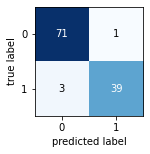

In [35]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat, figsize=(2, 2))
plt.show()

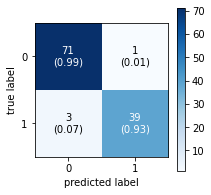

In [36]:
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))